In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset of handwritten digits
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Normalize the image data to the range [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

In [4]:
# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [5]:
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [6]:
# Define the CNN architecture using Keras Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [7]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
938/938 [==============================] - 58s 57ms/step - loss: 0.1831 - accuracy: 0.9458 - val_loss: 0.0524 - val_accuracy: 0.9815
Epoch 2/5
938/938 [==============================] - 48s 52ms/step - loss: 0.0509 - accuracy: 0.9846 - val_loss: 0.0376 - val_accuracy: 0.9883
Epoch 3/5
938/938 [==============================] - 50s 54ms/step - loss: 0.0373 - accuracy: 0.9885 - val_loss: 0.0315 - val_accuracy: 0.9893
Epoch 4/5
938/938 [==============================] - 49s 52ms/step - loss: 0.0285 - accuracy: 0.9910 - val_loss: 0.0327 - val_accuracy: 0.9896
Epoch 5/5
938/938 [==============================] - 48s 51ms/step - loss: 0.0225 - accuracy: 0.9927 - val_loss: 0.0300 - val_accuracy: 0.9917


In [9]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy: {test_acc}')

313/313 - 2s - loss: 0.0300 - accuracy: 0.9917 - 2s/epoch - 8ms/step
Test Accuracy: 0.9916999936103821


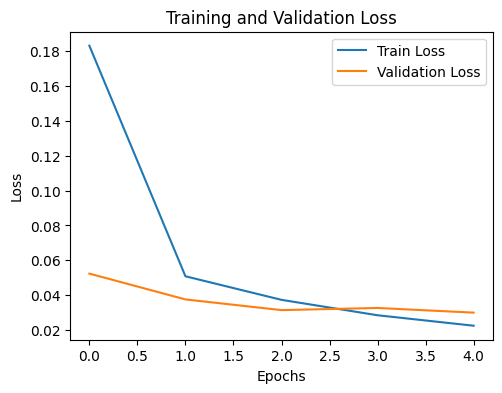

In [10]:
# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

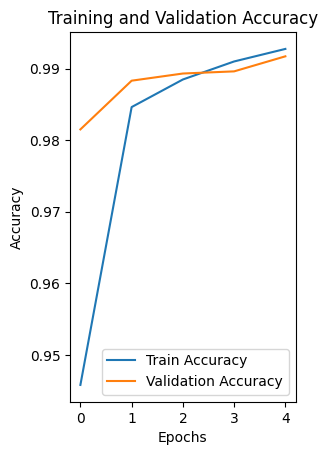

In [11]:
# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

In [15]:
model.save('mnist_cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 31ms/step


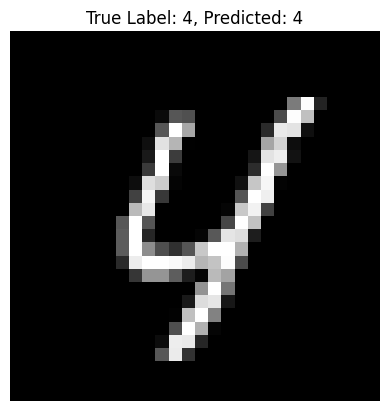

In [16]:
# Function to plot an image with its predicted and true labels
def plot_image_with_prediction(model, X_test, y_test, index):
    image = X_test[index].reshape(28, 28)

    # Get the model's prediction for the given image
    prediction = model.predict(X_test[index].reshape(1, 28, 28, 1))
    predicted_label = np.argmax(prediction)
    true_label = np.argmax(y_test[index])

    # Plot the image with the true and predicted labels
    plt.imshow(image, cmap='gray')
    plt.title(f"True Label: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

# Plot a specific image with its prediction
plot_image_with_prediction(model, X_test, y_test, index=555)